In [31]:
import torch
print("ashish")
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

ashish
cuda


In [32]:
# Add pruning code directory to system path
import sys
sys.path.append('../FPGM_pruning')
import models
from models.vgg_cifar10 import vgg


In [33]:
net = vgg('cifar10',19).to(device)

In [34]:
print(net)

vgg(
  (feature): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (8): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (9): ReLU(inplace=True)
    (10): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (11): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (12): ReLU(inplace=True)
    (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilatio

Files already downloaded and verified
Files already downloaded and verified


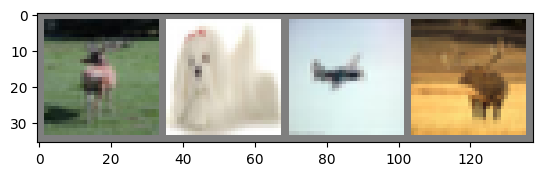

deer  dog   plane deer 


In [20]:
# Import necessary libraries
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

# Download and transform CIFAR-10 dataset
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='../Data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='../Data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

# Function to show an image
def imshow(img):
    img = img / 2 + 0.5  # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# Get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# Show images
imshow(torchvision.utils.make_grid(images))
# Print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(4)))


In [21]:
# Function to test the model
def test_model(net, testloader, return_accuracy=False):
    net.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for data in testloader:
            images, labels = data
            images, labels = images.to(device), labels.to(device)
            outputs = net(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    if return_accuracy:
        return accuracy
    print(f'Accuracy of the network on the 10000 test images: {accuracy:.2f}%')

In [2]:
pip install torch_pruning

Note: you may need to restart the kernel to use updated packages.


# train pruned model

In [16]:
!CUDA_VISIBLE_DEVICES=1 python ../FPGM_pruning/pruning_cifar_vgg.py  ../Data/cifar.python --dataset cifar10 --arch vgg \
--save_path output_vgg_19_fpgm \
--epochs 10 \
--rate_dist 0.6 \
--depth 16 \
--batch-size 256 \



save path : output_vgg_19_fpgm
{'data_path': './data/cifar.python', 'dataset': 'cifar10', 'batch_size': 256, 'test_batch_size': 256, 'epochs': 10, 'start_epoch': 0, 'lr': 0.1, 'momentum': 0.9, 'weight_decay': 0.0001, 'resume': '', 'no_cuda': False, 'seed': 1, 'log_interval': 100, 'save_path': 'output_vgg_19_fpgm', 'arch': 'vgg', 'depth': 16, 'rate_norm': 1, 'rate_dist': 0.6, 'layer_begin': 1, 'layer_end': 1, 'layer_inter': 1, 'epoch_prune': 1, 'dist_type': 'l2', 'use_state_dict': False, 'use_pretrain': False, 'pretrain_path': '', 'use_precfg': True, 'evaluate': False, 'arch_change': False, 'cuda': True}
Random Seed: 1
python version : 3.9.7 (default, Sep 16 2021, 13:09:58)  [GCC 7.5.0]
torch  version : 2.1.2+cu121
cudnn  version : 8902
Norm Pruning Rate: 1
Distance Pruning Rate: 0.6
Layer Begin: 1
Layer End: 1
Layer Inter: 1
Epoch prune: 1
use pretrain: False
Pretrain path: 
Dist type: l2
Pre cfg: True
Files already downloaded and verified
=> creating model 'vgg'
=> network :
 vgg(
  (

Train Epoch: 0 [0/50000 (0.0%)]	Loss: 2.313017
Train Epoch: 0 [25600/50000 (51.0%)]	Loss: 1.720218
Train Epoch: 0 	Average Loss: 1.666031, Accuracy: 19644/50000 (39.3%)
1.6660313327789307
train loss

Test set: Average loss: 1.5475, Accuracy: 4689/10000 (46.9%)

number of nonzero weight is 864, zero is 864
number of nonzero weight is 36864, zero is 0
number of nonzero weight is 73728, zero is 0
number of nonzero weight is 147456, zero is 0
number of nonzero weight is 294912, zero is 0
number of nonzero weight is 589824, zero is 0
number of nonzero weight is 589824, zero is 0
number of nonzero weight is 589824, zero is 589824
number of nonzero weight is 1179648, zero is 1179648
number of nonzero weight is 1179648, zero is 1179648
number of nonzero weight is 1179648, zero is 1179648
number of nonzero weight is 1179648, zero is 1179648
number of nonzero weight is 1179648, zero is 1179648
number of nonzero weight is 864, zero is 864
number of nonzero weight is 36864, zero is 0
number of non

number of nonzero weight is 589824, zero is 0
number of nonzero weight is 589824, zero is 0
number of nonzero weight is 589824, zero is 589824
number of nonzero weight is 1179648, zero is 1179648
number of nonzero weight is 1179648, zero is 1179648
number of nonzero weight is 1179648, zero is 1179648
number of nonzero weight is 1179648, zero is 1179648
number of nonzero weight is 1179648, zero is 1179648
number of nonzero weight is 864, zero is 864
number of nonzero weight is 36864, zero is 0
number of nonzero weight is 73728, zero is 0
number of nonzero weight is 147456, zero is 0
number of nonzero weight is 294912, zero is 0
number of nonzero weight is 589824, zero is 0
number of nonzero weight is 589824, zero is 0
number of nonzero weight is 589824, zero is 589824
number of nonzero weight is 1179648, zero is 1179648
number of nonzero weight is 1179648, zero is 1179648
number of nonzero weight is 1179648, zero is 1179648
number of nonzero weight is 1179648, zero is 1179648
number of 

# train unpruned model

In [41]:
!CUDA_VISIBLE_DEVICES=1 python ../FPGM_pruning/pruning_cifar_vgg.py  ./data/cifar.python --dataset cifar10 --arch vgg \
--save_path output_vgg_withoutprune_16_fpgm \
--epochs 5 \
--rate_dist 0 \
--depth 16 \
--batch-size 500

save path : output_vgg_withoutprune_16_fpgm
{'data_path': './data/cifar.python', 'dataset': 'cifar10', 'batch_size': 500, 'test_batch_size': 256, 'epochs': 5, 'start_epoch': 0, 'lr': 0.1, 'momentum': 0.9, 'weight_decay': 0.0001, 'resume': '', 'no_cuda': False, 'seed': 1, 'log_interval': 100, 'save_path': 'output_vgg_withoutprune_16_fpgm', 'arch': 'vgg', 'depth': 16, 'rate_norm': 1, 'rate_dist': 0.0, 'layer_begin': 1, 'layer_end': 1, 'layer_inter': 1, 'epoch_prune': 1, 'dist_type': 'l2', 'use_state_dict': False, 'use_pretrain': False, 'pretrain_path': '', 'use_precfg': False, 'evaluate': False, 'arch_change': False, 'cuda': True}
Random Seed: 1
python version : 3.9.7 (default, Sep 16 2021, 13:09:58)  [GCC 7.5.0]
torch  version : 2.1.2+cu121
cudnn  version : 8902
Norm Pruning Rate: 1
Distance Pruning Rate: 0.0
Layer Begin: 1
Layer End: 1
Layer Inter: 1
Epoch prune: 1
use pretrain: False
Pretrain path: 
Dist type: l2
Pre cfg: False
Files already downloaded and verified
=> creating model '


Test set: Average loss: 2.3026, Accuracy: 1010/10000 (10.1%)

 accu after is: 0.101 %
Train Epoch: 0 [0/50000 (0.0%)]	Loss: 2.313832
Train Epoch: 0 	Average Loss: 1.625818, Accuracy: 20081/50000 (40.2%)
1.6258181595802308
train loss

Test set: Average loss: 1.4007, Accuracy: 4987/10000 (49.9%)

number of nonzero weight is 1728, zero is 0
number of nonzero weight is 36864, zero is 0
number of nonzero weight is 73728, zero is 0
number of nonzero weight is 147456, zero is 0
number of nonzero weight is 294912, zero is 0
number of nonzero weight is 589824, zero is 0
number of nonzero weight is 589824, zero is 0
number of nonzero weight is 1179648, zero is 0
number of nonzero weight is 2359296, zero is 0
number of nonzero weight is 2359296, zero is 0
number of nonzero weight is 2359296, zero is 0
number of nonzero weight is 2359296, zero is 0
number of nonzero weight is 2359296, zero is 0
number of nonzero weight is 1728, zero is 0
number of nonzero weight is 36864, zero is 0
number of nonz

# plot for pruned model training

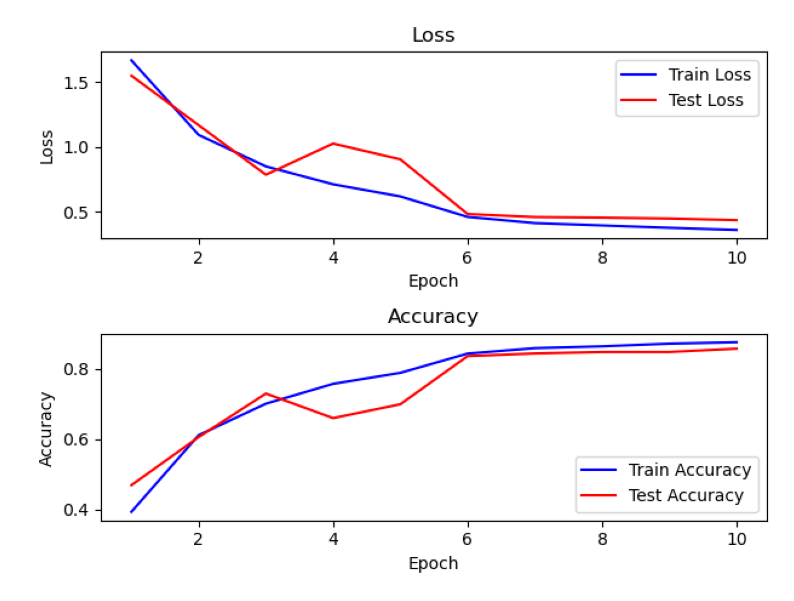

In [17]:
import matplotlib.pyplot as plt
from PIL import Image

def display_saved_plot(image_path):
    """
    Function to display a saved plot from a .png file.

    :: Inputs - image_path = path to the .png image file
    """
    # Open the image file
    img = Image.open(image_path)
    
    # Display the image
    plt.figure(figsize=(10, 10))
    plt.imshow(img)
    plt.axis('off')  # Turn off axis
    plt.show()

# Example usage
display_saved_plot("output_vgg_19_fpgm/curve.png")


# without pruned plot

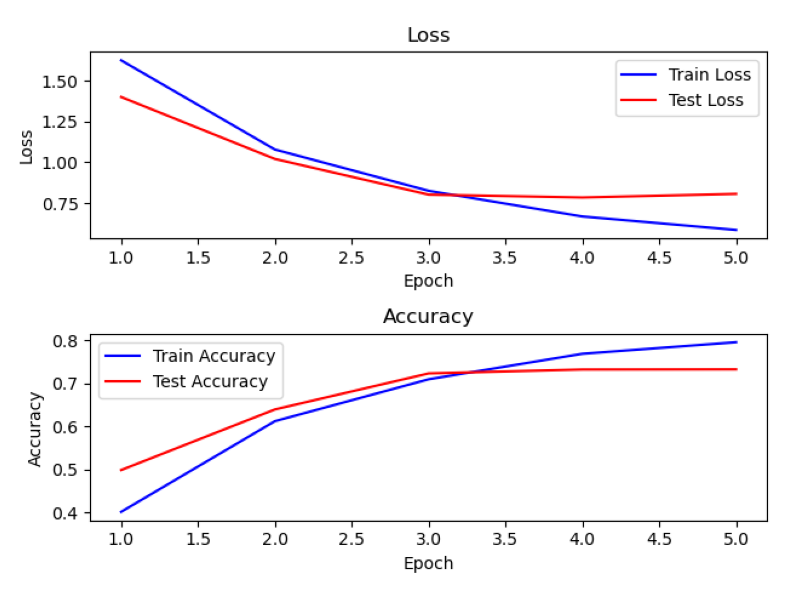

In [51]:
import matplotlib.pyplot as plt
from PIL import Image

def display_saved_plot(image_path):
    """
    Function to display a saved plot from a .png file.

    :: Inputs - image_path = path to the .png image file
    """
    # Open the image file
    img = Image.open(image_path)
    
    # Display the image
    plt.figure(figsize=(10, 10))
    plt.imshow(img)
    plt.axis('off')  # Turn off axis
    plt.show()

# Example usage
display_saved_plot("output_vgg_withoutprune_16_fpgm/curve.png")

In [25]:
# Load the trained model
import sys
sys.path.append('../FPGM_pruning')
import models
import torch



In [36]:
checkpoint = torch.load('output_vgg_19_fpgm/model_best.pth.tar')
model = vgg(dataset='cifar10', depth=16, cfg=checkpoint['cfg']).to(device)
model.load_state_dict(checkpoint['state_dict'])

<All keys matched successfully>

In [42]:
checkpoint = torch.load('output_vgg_withoutprune_16_fpgm/model_best.pth.tar')
unpruned_model = vgg(dataset='cifar10', depth=16, cfg=checkpoint['cfg']).to(device)
unpruned_model.load_state_dict(checkpoint['state_dict'])



<All keys matched successfully>

In [37]:
def calculate_sparsity(model):
    sparsity_dict = {}
    total_params = 0
    sparse_params = 0
    
    for name, module in model.named_modules():
        module_total_params = 0
        module_sparse_params = 0
        has_param = False
        for pname, param in module.named_parameters(recurse=False):
            if param.requires_grad:
                param_total = param.numel()
                param_sparse = (param == 0).sum().item()
                
                module_total_params += param_total
                module_sparse_params += param_sparse
                total_params += param_total
                sparse_params += param_sparse
                has_param = True
                
        if has_param:  # Only include modules with parameters
            if module_total_params > 0:
                module_sparsity = module_sparse_params / module_total_params
            else:
                module_sparsity = 0
            sparsity_dict[name] = module_sparsity
    
    overall_sparsity = sparse_params / total_params
    return sparsity_dict, total_params, sparse_params, overall_sparsity

def print_sparsity(sparsity_dict, total_params, sparse_params, overall_sparsity):
    for module_name, sparsity in sparsity_dict.items():
        print(f"Module: {module_name}, Sparsity: {sparsity:.4f}")
    print(f"Total Trainable Parameters: {total_params}")
    print(f"Sparse Parameters: {sparse_params}")
    print(f"Overall Sparsity: {overall_sparsity:.4f}")
    print(f"Percentage of Pruned Parameters: {overall_sparsity * 100:.2f}%")


In [39]:
# Calculate and print the sparsity
sparsity_dict, total_params, sparse_params, overall_sparsity = calculate_sparsity(model)
print_sparsity(sparsity_dict, total_params, sparse_params, overall_sparsity)

Module: feature.0, Sparsity: 0.5000
Module: feature.1, Sparsity: 0.2500
Module: feature.3, Sparsity: 0.0000
Module: feature.4, Sparsity: 0.0000
Module: feature.7, Sparsity: 0.0000
Module: feature.8, Sparsity: 0.0000
Module: feature.10, Sparsity: 0.0000
Module: feature.11, Sparsity: 0.0000
Module: feature.14, Sparsity: 0.0000
Module: feature.15, Sparsity: 0.0000
Module: feature.17, Sparsity: 0.0000
Module: feature.18, Sparsity: 0.0000
Module: feature.20, Sparsity: 0.0000
Module: feature.21, Sparsity: 0.0000
Module: feature.24, Sparsity: 0.5000
Module: feature.25, Sparsity: 0.2500
Module: feature.27, Sparsity: 0.5000
Module: feature.28, Sparsity: 0.2500
Module: feature.30, Sparsity: 0.5000
Module: feature.31, Sparsity: 0.2500
Module: feature.34, Sparsity: 0.5000
Module: feature.35, Sparsity: 0.2500
Module: feature.37, Sparsity: 0.5000
Module: feature.38, Sparsity: 0.2500
Module: feature.40, Sparsity: 0.5000
Module: feature.41, Sparsity: 0.2500
Module: classifier.0, Sparsity: 0.0000
Modul

# 1. Weight Distribution Histograms

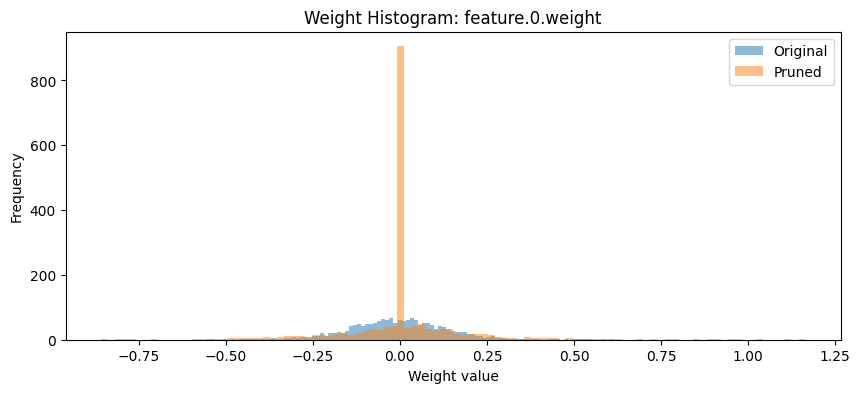

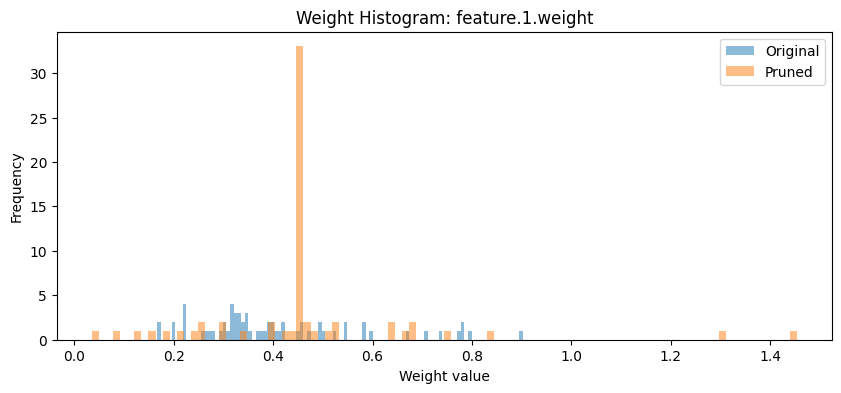

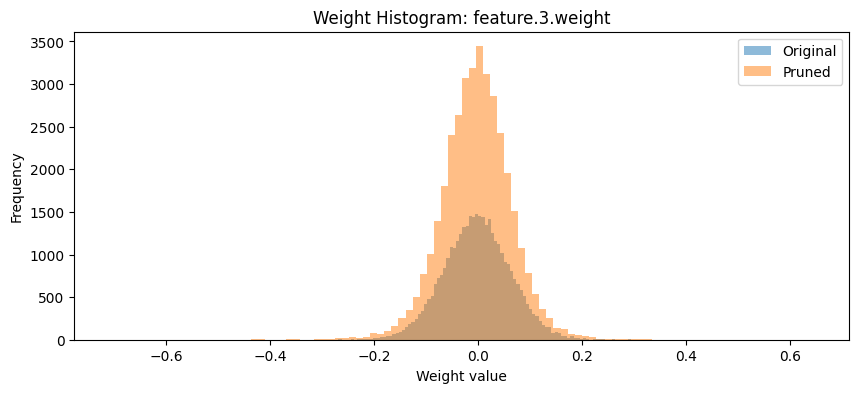

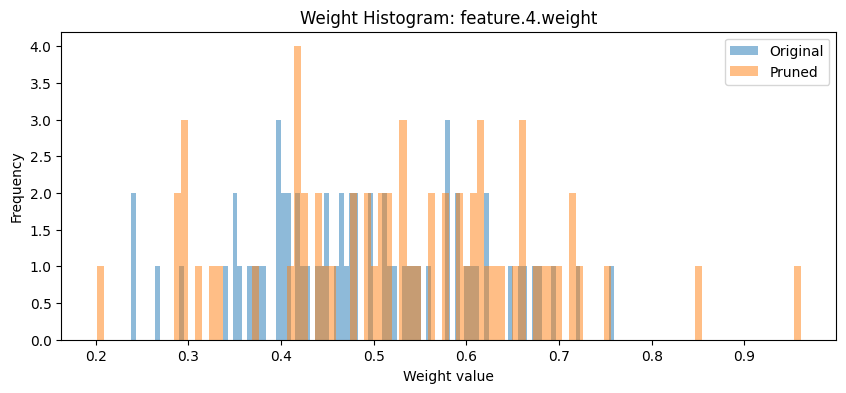

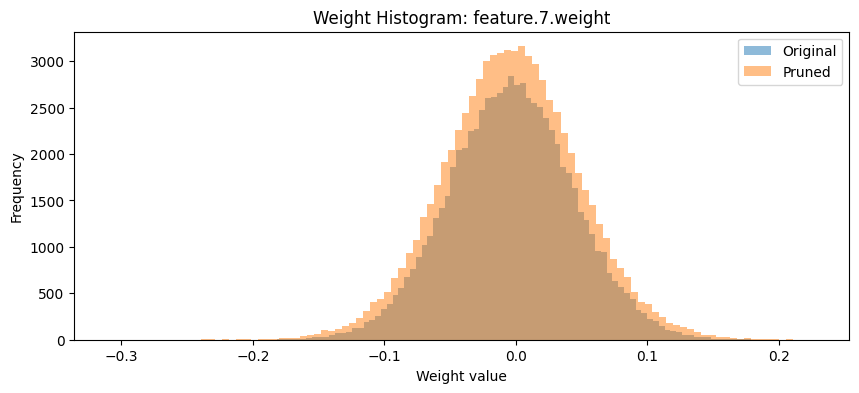

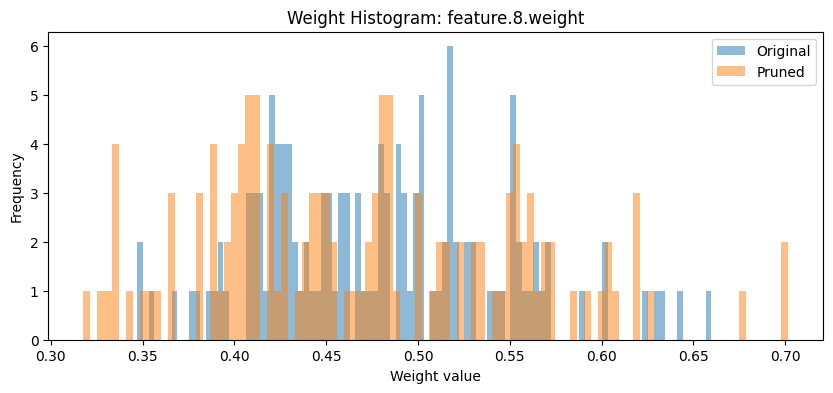

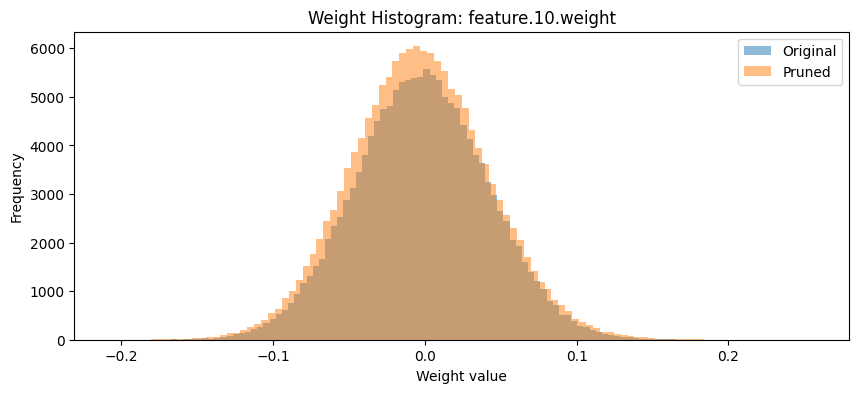

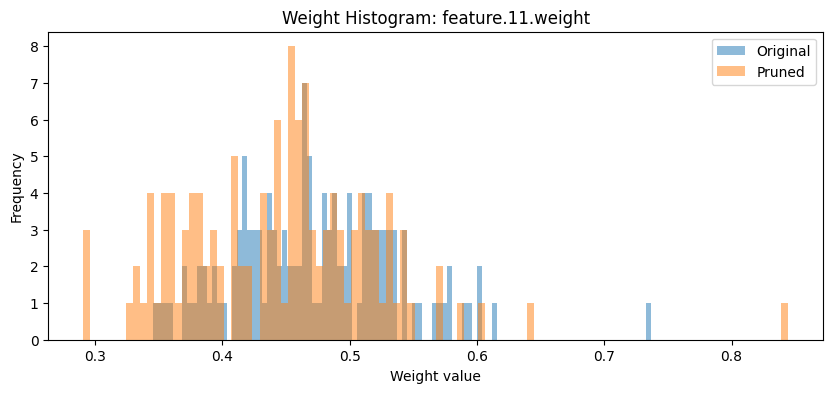

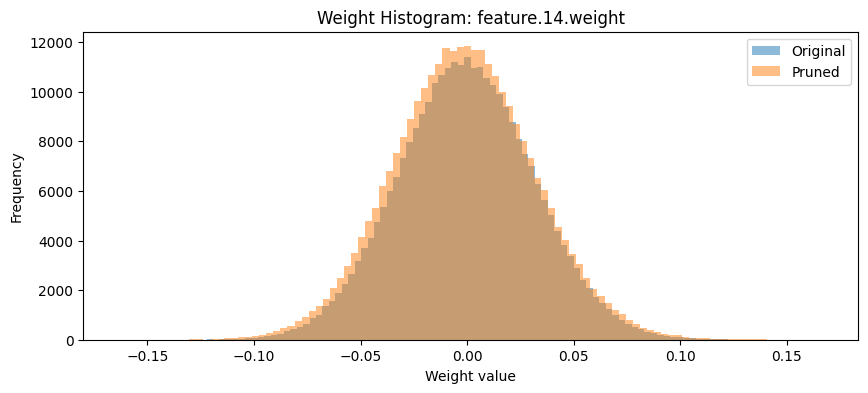

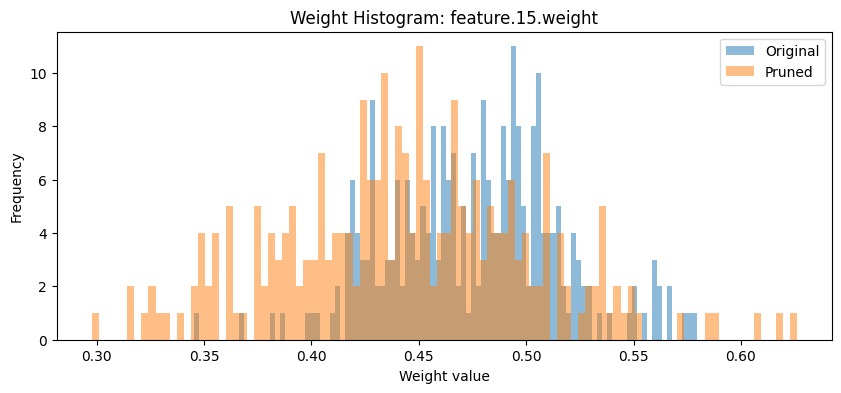

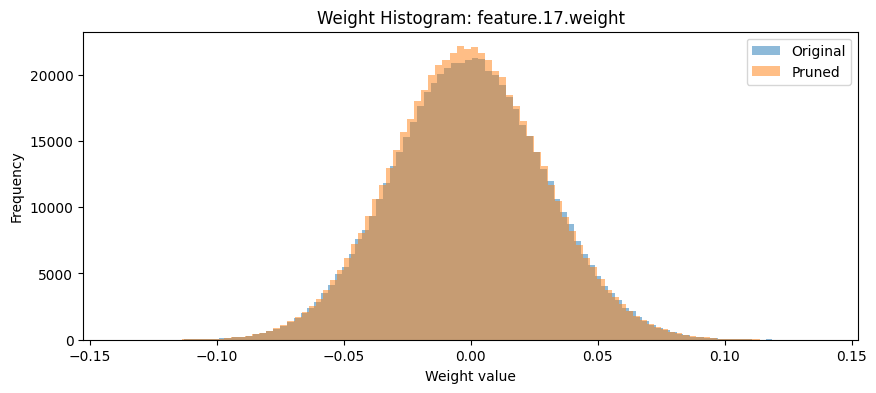

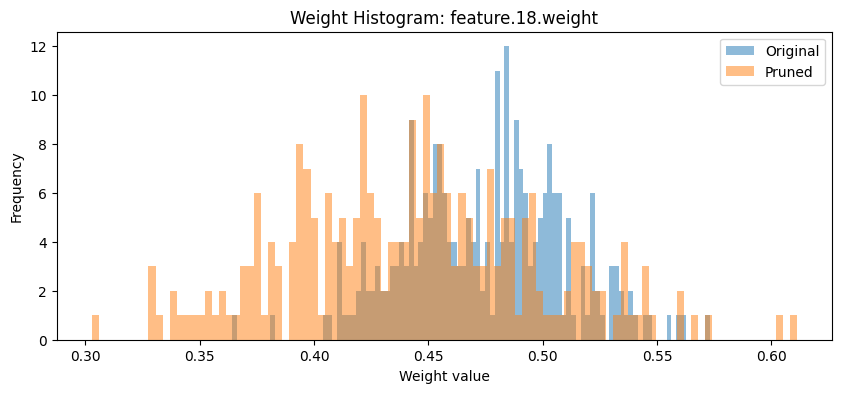

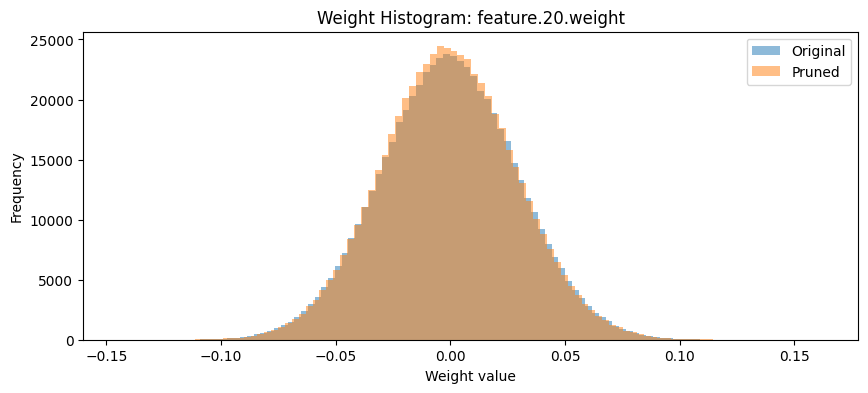

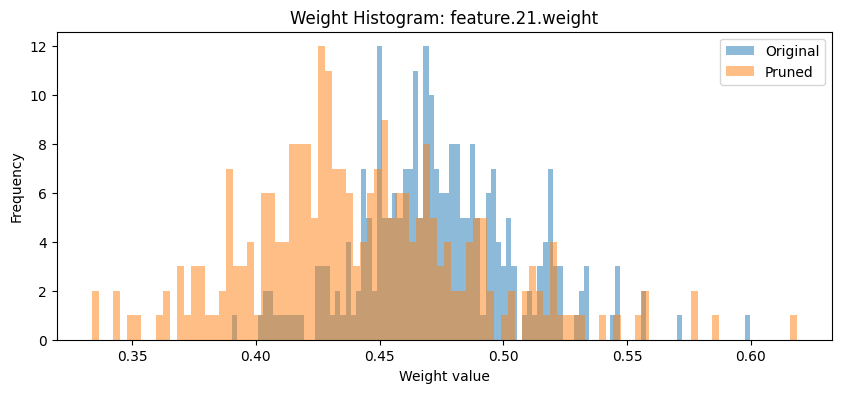

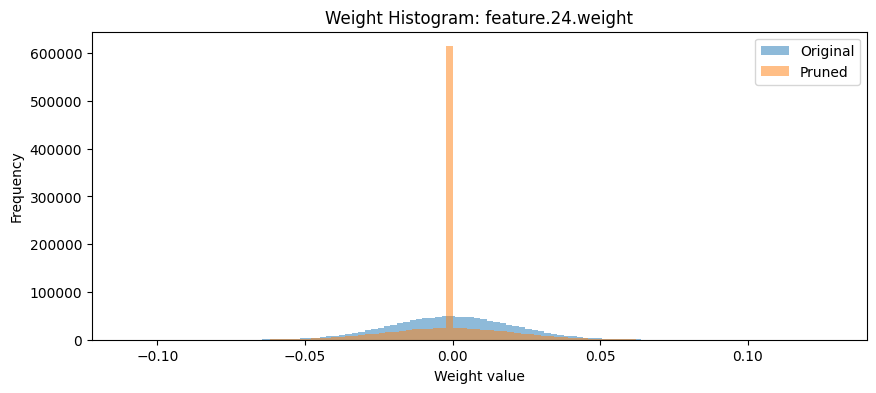

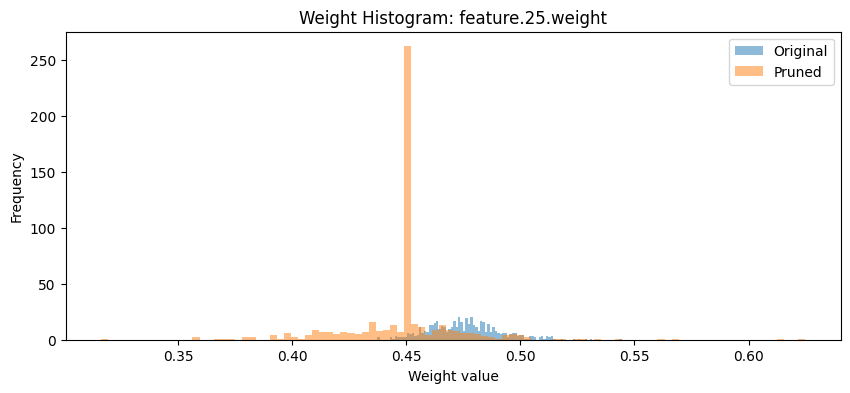

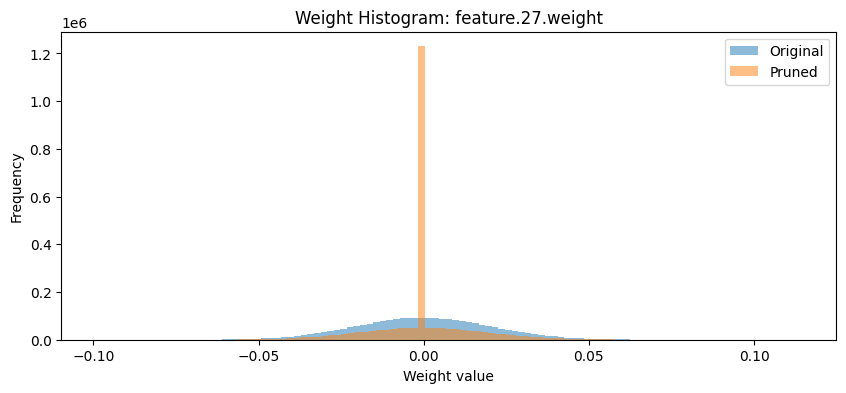

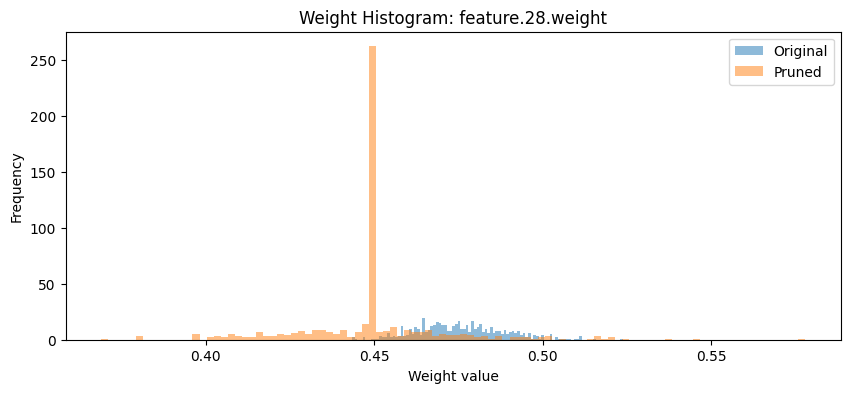

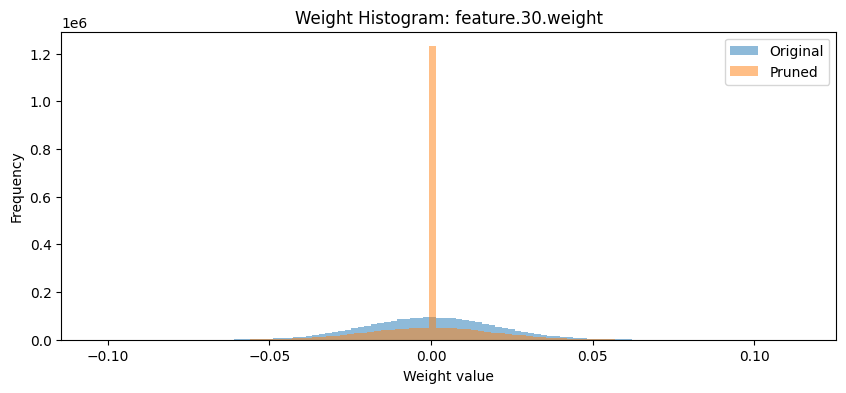

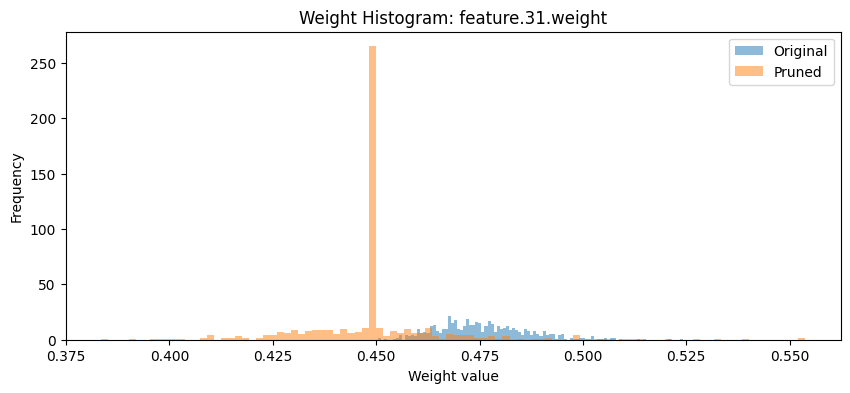

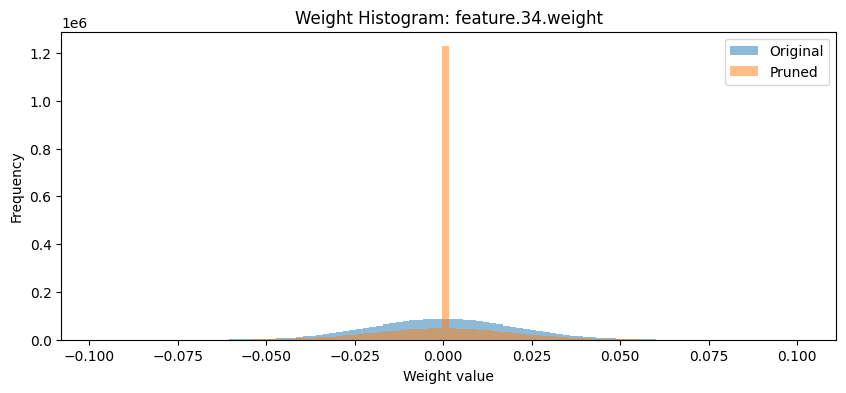

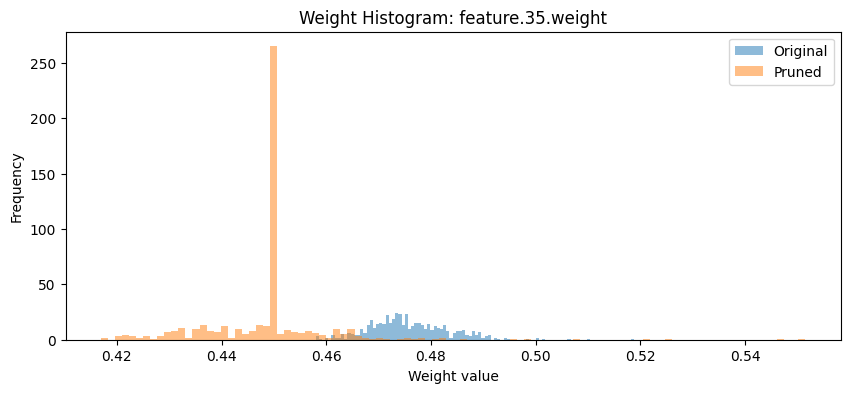

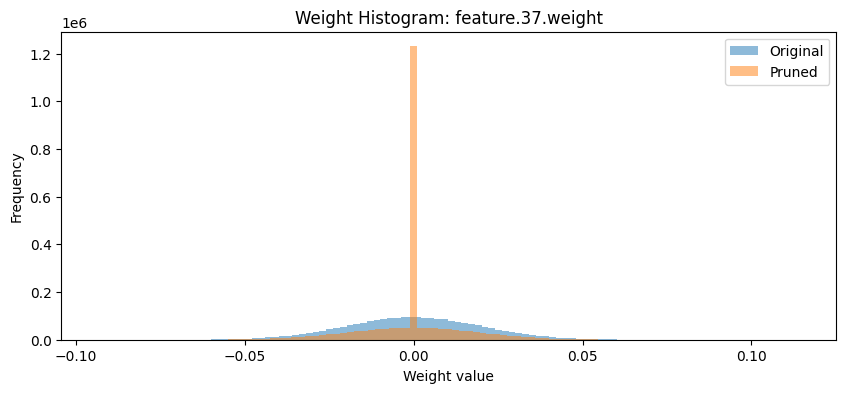

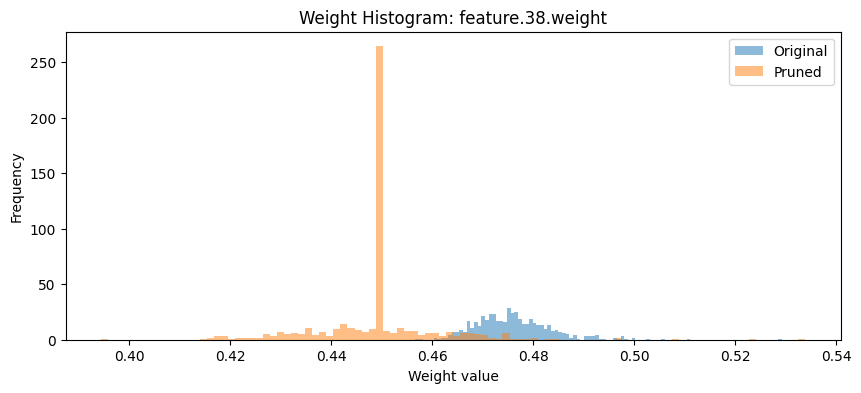

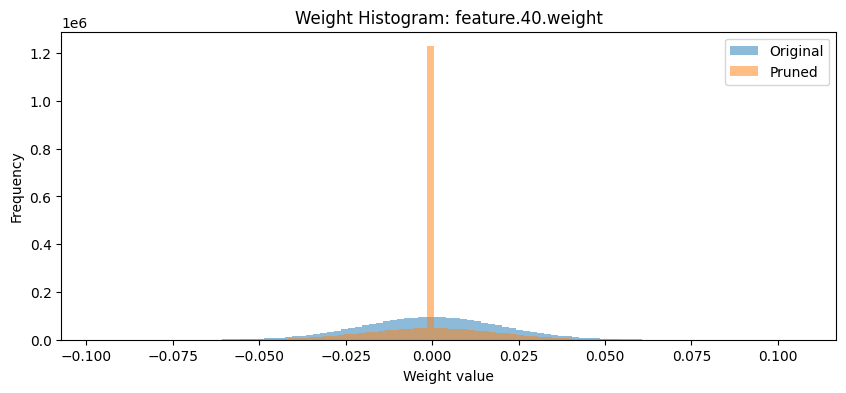

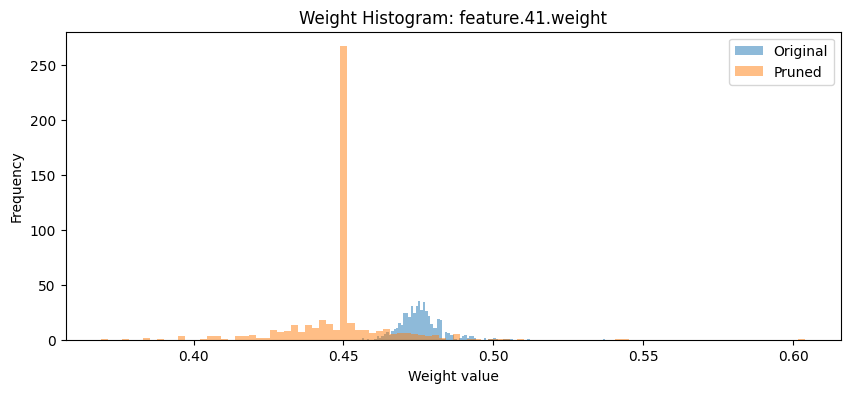

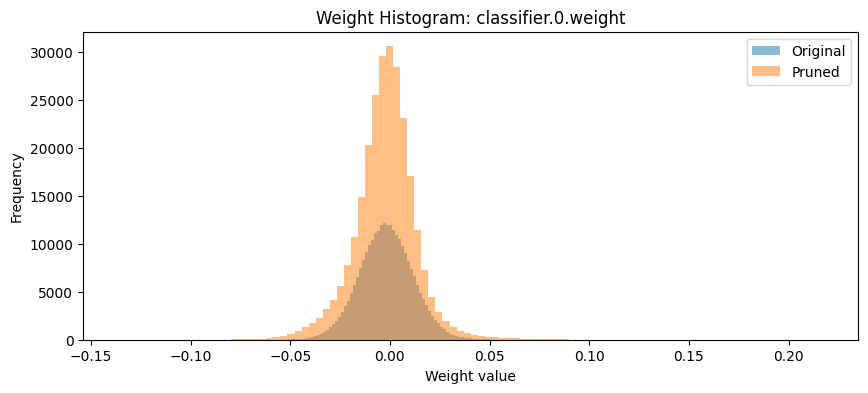

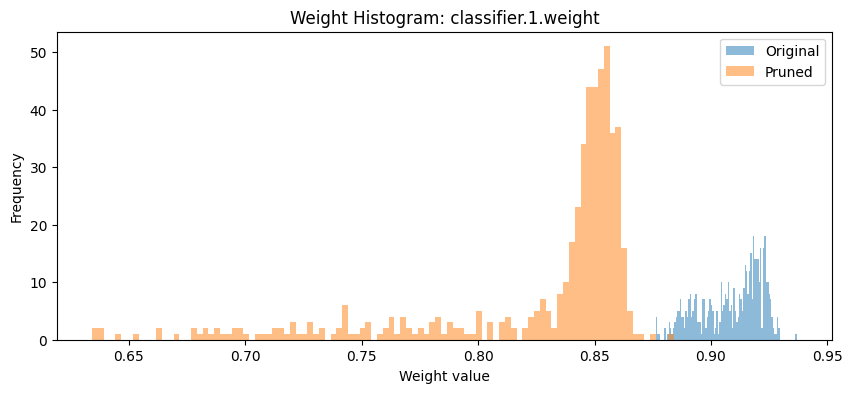

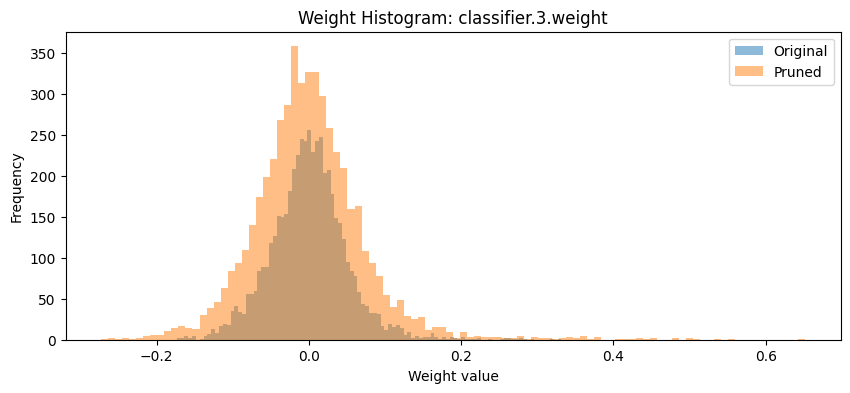

In [45]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np


# Function to plot weight histograms before and after pruning
def plot_weight_histograms(original_model, pruned_model):
    for (name1, param1), (name2, param2) in zip(original_model.named_parameters(), pruned_model.named_parameters()):
        if 'weight' in name1 and 'weight' in name2:
            plt.figure(figsize=(10, 4))
            plt.hist(param1.cpu().detach().numpy().flatten(), bins=100, alpha=0.5, label='Original')
            plt.hist(param2.cpu().detach().numpy().flatten(), bins=100, alpha=0.5, label='Pruned')
            plt.title(f'Weight Histogram: {name1}')
            plt.xlabel('Weight value')
            plt.ylabel('Frequency')
            plt.legend()
            plt.show()

# Plot weight histograms for both models
plot_weight_histograms(unpruned_model, model)

# Average Sparsity by Layer Type

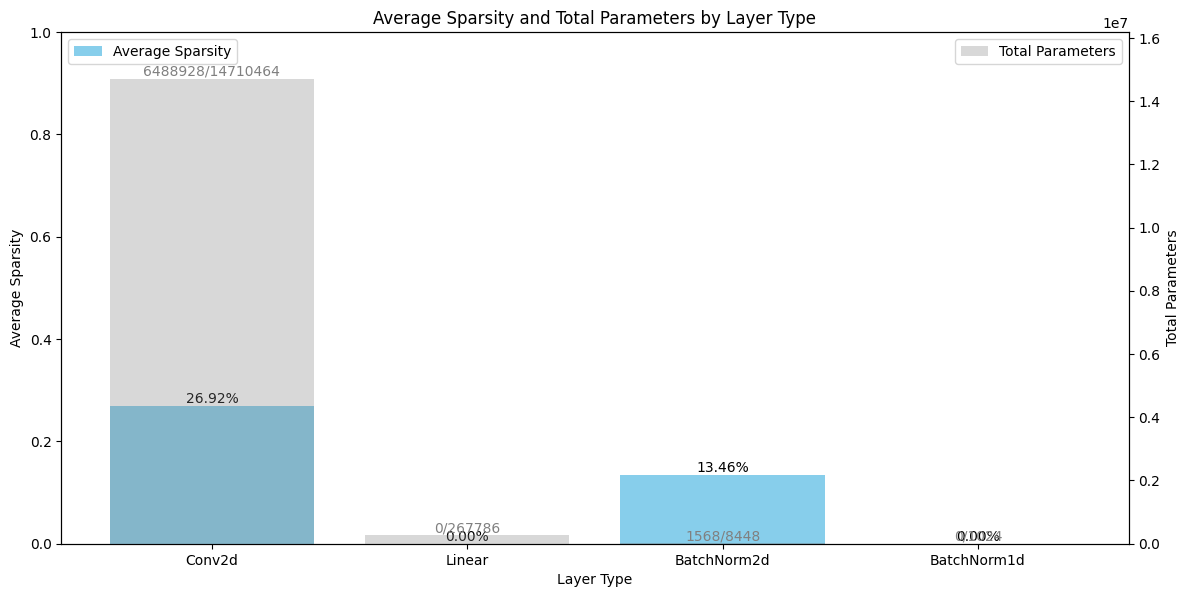

In [47]:


# Define a function to calculate the sparsity
def calculate_sparsity(model):
    sparsity_dict = {}
    total_params = 0
    sparse_params = 0
    
    for name, module in model.named_modules():
        module_total_params = 0
        module_sparse_params = 0
        has_param = False
        for pname, param in module.named_parameters(recurse=False):
            if param.requires_grad:
                param_total = param.numel()
                param_sparse = (param == 0).sum().item()
                
                module_total_params += param_total
                module_sparse_params += param_sparse
                total_params += param_total
                sparse_params += param_sparse
                has_param = True
                
        if has_param:  # Only include modules with parameters
            if module_total_params > 0:
                module_sparsity = module_sparse_params / module_total_params
            else:
                module_sparsity = 0
            sparsity_dict[name] = (module_sparsity, module_total_params, module_sparse_params)
    
    overall_sparsity = sparse_params / total_params
    return sparsity_dict, total_params, sparse_params, overall_sparsity

# Define a function to aggregate sparsity by layer type
def aggregate_sparsity(sparsity_dict, model):
    layer_sparsity = {
        'Conv2d': [],
        'Linear': [],
        'BatchNorm2d': [],
        'BatchNorm1d': []
    }
    
    for name, module in model.named_modules():
        if isinstance(module, nn.Conv2d):
            layer_sparsity['Conv2d'].append(sparsity_dict[name])
        elif isinstance(module, nn.Linear):
            layer_sparsity['Linear'].append(sparsity_dict[name])
        elif isinstance(module, nn.BatchNorm2d):
            layer_sparsity['BatchNorm2d'].append(sparsity_dict[name])
        elif isinstance(module, nn.BatchNorm1d):
            layer_sparsity['BatchNorm1d'].append(sparsity_dict[name])
    
    # Average sparsity for each layer type
    aggregated_sparsity = {}
    for layer, sparsities in layer_sparsity.items():
        if sparsities:
            avg_sparsity = np.mean([s[0] for s in sparsities])
            total_params = sum([s[1] for s in sparsities])
            sparse_params = sum([s[2] for s in sparsities])
            aggregated_sparsity[layer] = (avg_sparsity, total_params, sparse_params)
        else:
            aggregated_sparsity[layer] = (0.0, 0, 0)
    
    return aggregated_sparsity

# Define a function to plot the aggregated sparsity
def plot_aggregated_sparsity(aggregated_sparsity):
    layer_types = list(aggregated_sparsity.keys())
    sparsity_values = [s[0] for s in aggregated_sparsity.values()]
    total_params = [s[1] for s in aggregated_sparsity.values()]
    sparse_params = [s[2] for s in aggregated_sparsity.values()]
    sparse_percentages = [sparsity * 100 for sparsity in sparsity_values]
    
    fig, ax1 = plt.subplots(figsize=(12, 6))

    ax2 = ax1.twinx()
    ax1.bar(layer_types, sparsity_values, color='skyblue', label='Average Sparsity')
    ax2.bar(layer_types, total_params, alpha=0.3, color='gray', label='Total Parameters')
    
    ax1.set_xlabel('Layer Type')
    ax1.set_ylabel('Average Sparsity')
    ax2.set_ylabel('Total Parameters')

    for i, (sparsity, total, sparse, percent) in enumerate(zip(sparsity_values, total_params, sparse_params, sparse_percentages)):
        ax1.text(i, sparsity, f'{percent:.2f}%', ha='center', va='bottom')
        ax2.text(i, total, f'{sparse}/{total}', ha='center', va='bottom', color='gray')

    ax1.set_ylim(0, 1)
    ax2.set_ylim(0, max(total_params) * 1.1)

    fig.tight_layout()
    plt.title('Average Sparsity and Total Parameters by Layer Type')
    ax1.legend(loc='upper left')
    ax2.legend(loc='upper right')
    plt.show()

# Calculate and plot sparsity
sparsity_dict, total_params, sparse_params, overall_sparsity = calculate_sparsity(model)
aggregated_sparsity = aggregate_sparsity(sparsity_dict, model)
plot_aggregated_sparsity(aggregated_sparsity)
